In [2]:
import pandas as pd
import os

### Merging 12 csvs into a single dataframe

In [3]:
data_list = os.listdir("SalesAnalysis/Sales_Data")

all =  pd.DataFrame()

n = 0
for i in data_list:
    temp = pd.read_csv("SalesAnalysis/Sales_Data/"+i)
    
    if n != 0:
        temp.drop(temp.index[0])
        
    n += 1
    
    all = pd.concat([all,temp])


In [4]:
all = all[all["Order Date"].str[0:2] != "Or"]
all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Create Month Column

In [7]:
all["Month"] = all["Order Date"].str[0:2]
all["Month"] = pd.to_numeric(all["Month"])

# Get rid of row that contains NaN
all = all.dropna(how='all')
all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Create Sales column

In [8]:
all["Quantity Ordered"] = pd.to_numeric(all["Quantity Ordered"])
all["Price Each"] = pd.to_numeric(all["Price Each"])

all["Sales"] = all["Quantity Ordered"] * all["Price Each"]
all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# Question #1: What was the best month for sales?

In [9]:
sales = all.groupby("Month").sum()["Sales"]
all.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


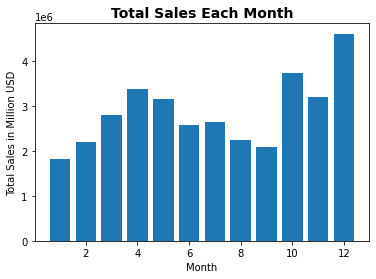

In [10]:
import matplotlib.pyplot as plt

month = list(range(1,13,1))

plt.bar(month,sales)
plt.title("Total Sales Each Month", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales in Million USD")
plt.show()
print("="*127)

In [11]:
all["City"] = all["Purchase Address"].apply(lambda x: f"{x.split(', ')[1]} ({x.split(', ')[2].split(' ')[0]})")

all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [12]:
cities_sale = all.groupby("City").sum()

cities = []
sales = []
for i, v in cities_sale.iterrows():
    cities.append(i)
    sales.append(v["Sales"])
    
cities_sale


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


# Question #2: What city sold the most product? 

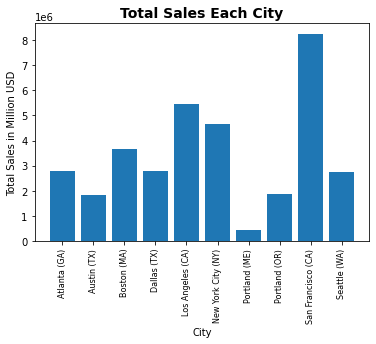

In [13]:
plt.bar(cities, sales)
plt.xticks(cities, rotation="vertical",size=8)
plt.title("Total Sales Each City", fontsize=14, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Total Sales in Million USD")

plt.show()
print("="*127)

In [14]:
all["Order Date"] = pd.to_datetime(all["Order Date"])

In [15]:
all["Hour"] = all["Order Date"].dt.hour

all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [16]:
count = all.groupby("Hour").count()

hour = []
quantity = []
for i, v in count.iterrows():
    hour.append(i)
    quantity.append(v["Quantity Ordered"])


In [17]:
sum = all.groupby("Hour").sum()

sum_sales = []
for i, v in sum.iterrows():
    sum_sales.append(v["Sales"])

print(sum_sales)

[713721.2699999819, 460866.8800000001, 234851.43999999948, 145757.8899999999, 162661.01000000007, 230679.81999999925, 448113.00000000006, 744854.1199999785, 1192348.9699999474, 1639030.5799999244, 1944286.7699998997, 2300610.2400000147, 2316821.3400000557, 2155389.7999999365, 2083672.7299999031, 1941549.5999999081, 1904601.3099999072, 2129361.6099999226, 2219348.2999999807, 2412938.5400000936, 2281716.240000029, 2042000.8599999032, 1607549.2099999231, 1179304.4399999485]


# Question #3: What time should we display advertisements to maximize the likelihood of purchases? 

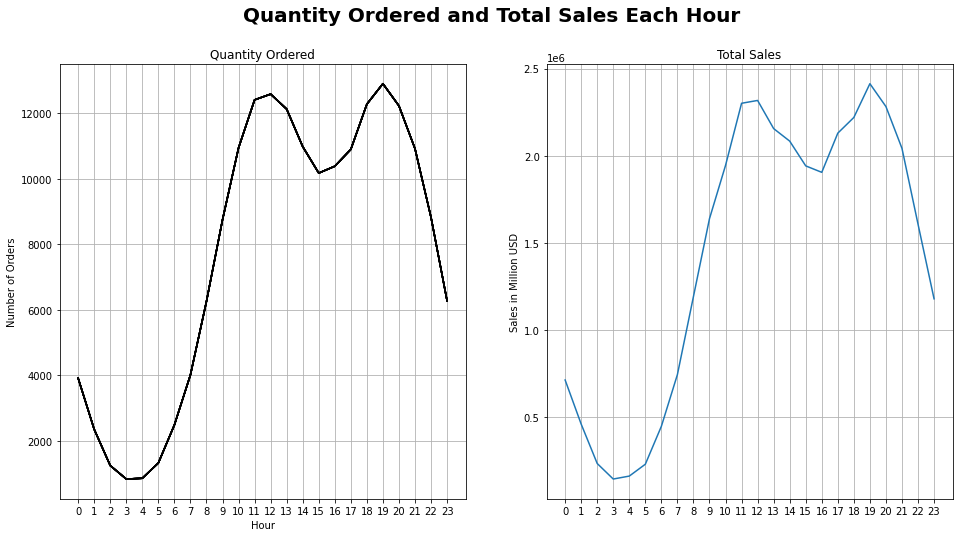

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))

fig.suptitle("Quantity Ordered and Total Sales Each Hour", fontsize=20, fontweight='bold')

ax1.plot(hour, count,color="black")
ax1.set_xticks(hour)
ax1.set_title("Quantity Ordered")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Number of Orders")
ax1.grid()

ax2.plot(hour, sum_sales)
ax2.set_xticks(hour)
ax2.set_title("Total Sales")
ax1.set_xlabel("Hour")
ax2.set_ylabel("Sales in Million USD")
ax2.grid()

plt.show()

print("="*127)

In [64]:
all_together = all[all.duplicated(subset="Order ID",keep=False)]
all_together["Products"] = all_together.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
all_together["Total Sales"] = all_together.groupby("Order ID")["Sales"].transform(lambda x: x.sum())

all_together = all_together[["Order ID", "Products", "Total Sales"]].drop_duplicates().reset_index()
all_together = all_together.drop(['index'], axis=1)

all_together

<ipython-input-64-7cfdba3abcd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_together["Products"] = all_together.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
<ipython-input-64-7cfdba3abcd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_together["Total Sales"] = all_together.groupby("Order ID")["Sales"].transform(lambda x: x.sum())


,Order ID,Products,Total Sales
0,176560,"Google Phone, Wired Headphones",611.99
1,176574,"Google Phone, USB-C Charging Cable",611.95
2,176585,"Bose SoundSport Headphones, Bose SoundSport He...",199.98
3,176586,"AAA Batteries (4-pack), Google Phone",605.98
4,176672,"Lightning Charging Cable, USB-C Charging Cable",26.90
...,...,...,...
7131,259296,"Apple Airpods Headphones, Apple Airpods Headph...",300.00
7132,259297,"iPhone, Lightning Charging Cable, Lightning Ch...",729.90
7133,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)",383.83
7134,259314,"Wired Headphones, AAA Batteries (4-pack)",17.97


In [65]:
all_together

,Order ID,Products,Total Sales
0,176560,"Google Phone, Wired Headphones",611.99
1,176574,"Google Phone, USB-C Charging Cable",611.95
2,176585,"Bose SoundSport Headphones, Bose SoundSport He...",199.98
3,176586,"AAA Batteries (4-pack), Google Phone",605.98
4,176672,"Lightning Charging Cable, USB-C Charging Cable",26.90
...,...,...,...
7131,259296,"Apple Airpods Headphones, Apple Airpods Headph...",300.00
7132,259297,"iPhone, Lightning Charging Cable, Lightning Ch...",729.90
7133,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)",383.83
7134,259314,"Wired Headphones, AAA Batteries (4-pack)",17.97


# Question #4: What products are most often sold together?

In [77]:
from itertools import combinations
from collections import Counter

count = Counter()

for i in all_together["Products"]:
    x = i.split(", ")
    count.update(Counter(combinations(x, 2)))
    

for i in count.most_common(10):
    print(i)

(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


In [81]:
count = Counter()

for i in all_together["Products"]:
    x = i.split(", ")
    count.update(Counter(combinations(x, 3)))
    

for i in count.most_common(10):
    print(i)
    
print("="*127)

(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87)
(('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62)
(('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47)
(('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33)
(('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27)
(('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 16)
(('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)
(('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)


In [94]:
most = all.groupby("Product").sum()
most = most[["Quantity Ordered","Sales"]]

prod = []
quant = []
sum_sales = []

for i, v in most.iterrows():
    prod.append(i)
    quant.append(v["Quantity Ordered"])
    sum_sales.append(v["Sales"])

most

,Quantity Ordered,Sales
Product,,
20in Monitor,4129,454148.71
27in 4K Gaming Monitor,6244,2435097.56
27in FHD Monitor,7550,1132424.50
34in Ultrawide Monitor,6199,2355558.01
AA Batteries (4-pack),27635,106118.40
AAA Batteries (4-pack),31017,92740.83
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
Flatscreen TV,4819,1445700.00


In [112]:
price = all.groupby("Product").mean()
prices = []
for i,v in price.iterrows():
    prices.append(v["Price Each"])
prices

[109.98999999999407,
 389.9900000000232,
 149.98999999999205,
 379.9900000000163,
 3.8399999999980117,
 2.989999999999419,
 150.0,
 99.98999999999184,
 300.0,
 600.0,
 600.0,
 600.0,
 14.950000000006098,
 1700.0,
 999.9900000001056,
 11.950000000004783,
 400.0,
 11.989999999997403,
 700.0]

# Question #5: What product sold the most? Why do you think it did?

<ipython-input-134-250e9d313d96>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod,rotation=90,size=8)


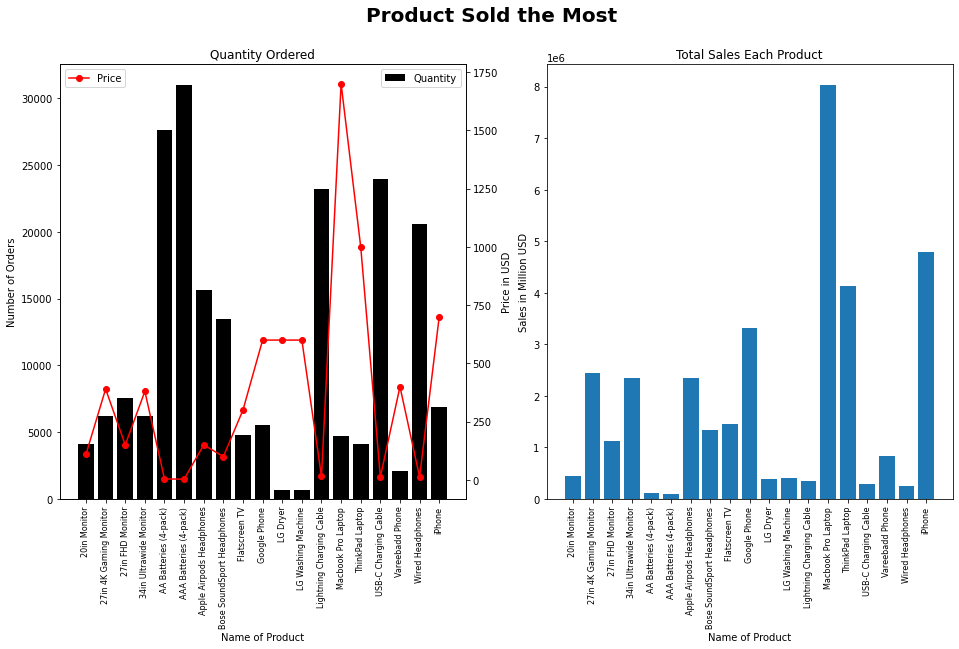

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))

fig.suptitle("Product Sold the Most", fontsize=20, fontweight='bold')

ax1_1 = ax1.twinx()

ax1.bar(prod, quant,color="black",label="Quantity")
ax1.set_xticks(prod)
ax1_1.plot(prod,prices,"o-",color="red",label="Price")
ax1.set_xticklabels(prod,rotation=90,size=8)
ax1.set_title("Quantity Ordered")
ax1.set_xlabel("Name of Product")
ax1.set_ylabel("Number of Orders")
ax1_1.set_ylabel("Price in USD")
ax1.legend(loc=0)
ax1_1.legend(loc=2)

ax2.bar(prod, sum_sales)
ax2.set_xticks(prod)
ax2.set_xticklabels(prod,rotation=90,size=8)
ax2.set_title("Total Sales Each Product")
ax2.set_xlabel("Name of Product")
ax2.set_ylabel("Sales in Million USD")

plt.show()